In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

np.set_printoptions(suppress=True)

## Find chessboard points in all iamges

In [2]:
# Object points in 3D
GRID_SHAPE = (9,6)
objp = np.zeros((GRID_SHAPE[0]*GRID_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_SHAPE[0], 0:GRID_SHAPE[1]].T.reshape(-1,2)
objp *= 25 # One square on my grid has 20mm

processing 003.png


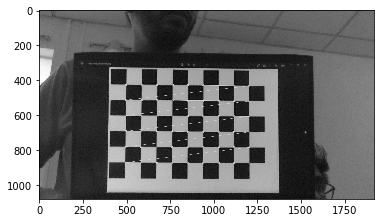

processing 005.png


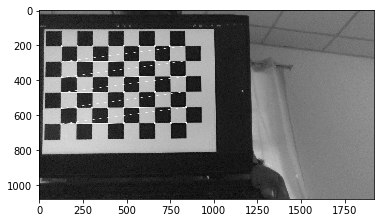

processing 008.png


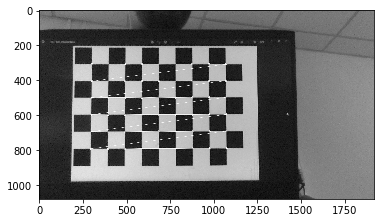

processing 007.png


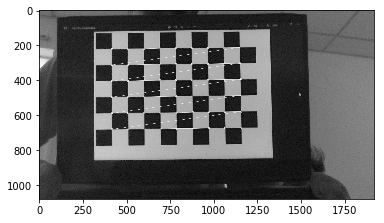

processing 001.png


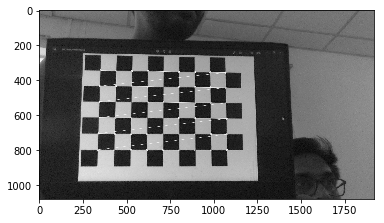

processing 004.png


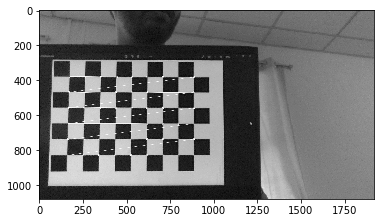

processing 006.png


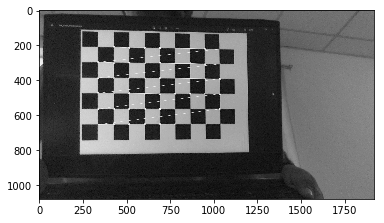

processing 009.png


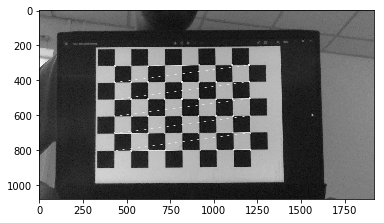

processing 002.png


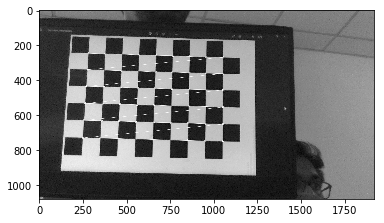

In [25]:
FOLDER = "../calib_images2/left/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname)
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, GRID_SHAPE, flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

## Get calibration parameters

In [4]:
ret, K_l, dist_coeff_l, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None,None)

In [5]:
K_l # intrinsic param matrix

array([[ 1561.46158081,     0.        ,   962.68404427],
       [    0.        ,  1561.13056405,   659.95663259],
       [    0.        ,     0.        ,     1.        ]])

In [15]:
A = np.matrix('2.3514637954922700e+03,0,1.6279010156971583e+03;0,2.3503357934366863e+03,1.1423143921806941e+03;0,0,1')
A

matrix([[ 2351.46379549,     0.        ,  1627.9010157 ],
        [    0.        ,  2350.33579344,  1142.31439218],
        [    0.        ,     0.        ,     1.        ]])

In [44]:
dist_coeff_l # lens distortion coefficients

array([[-0.37578145,  0.26751151, -0.00028693,  0.00141248, -0.16629889]])

In [22]:
B = np.matrix('9.1544751338718662e+00,1.9653565223200996e+01,2.1682720844590207e-03,-3.7066254107680336e-03,4.5009476679460910e+01, 9.3736964850610160e+00,1.9483983629485238e+01,4.6077892885253448e+01,1.2410284030147153e-03,2.3270841304802547e-03,-1.4291765293031686e-04,-7.4739209588205028e-04')
B

matrix([[  9.15447513,  19.65356522,   0.00216827,  -0.00370663,
          45.00947668,   9.37369649,  19.48398363,  46.07789289,
           0.00124103,   0.00232708,  -0.00014292,  -0.00074739]])

In [23]:
K_l = A
dist_coeff_l = B

## Undistort an image

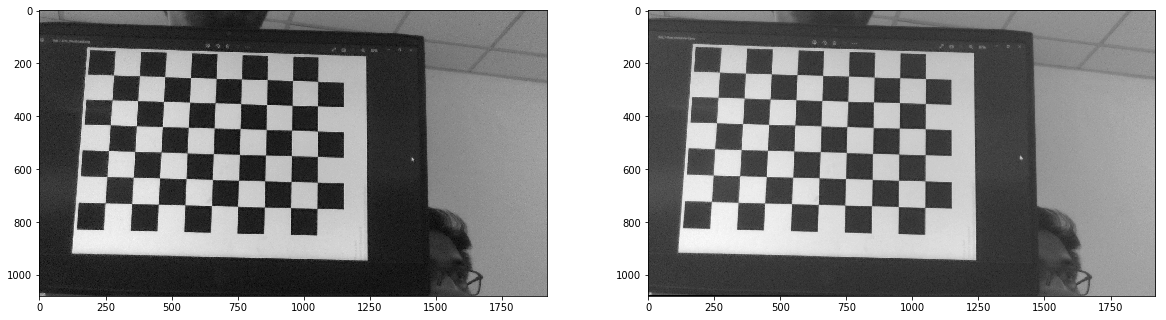

In [26]:
img = Image.open(FOLDER+"002.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_l, dist_coeff_l, None, K_l)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

## Repeat for right image

processing 003.png


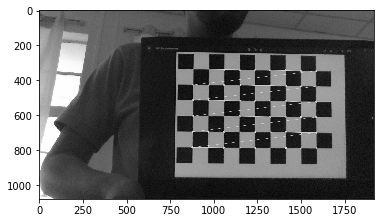

processing 005.png


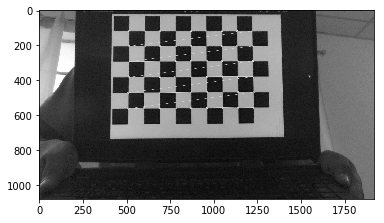

processing 008.png


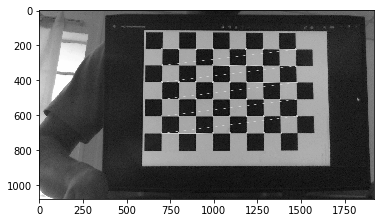

processing 007.png


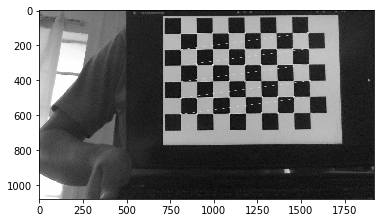

processing 001.png


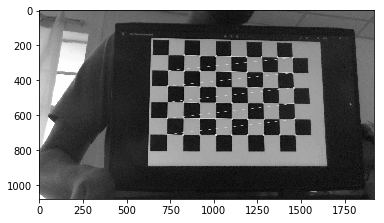

processing 004.png


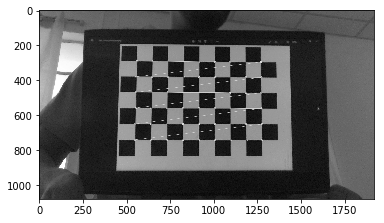

processing 006.png


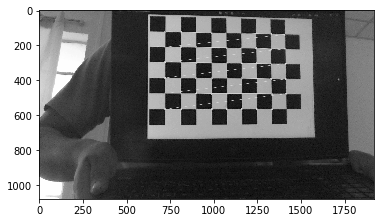

processing 009.png


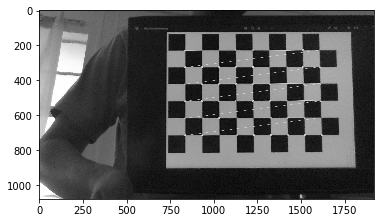

processing 002.png


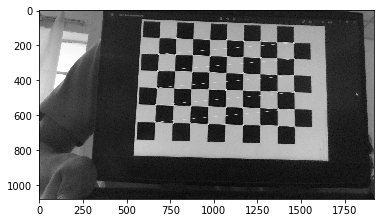

In [27]:
FOLDER = "../calib_images2/right/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname)
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, (9,6), flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

In [28]:
ret, K_r, dist_coeff_r, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None, None)

In [29]:
K_r

array([[ 1978.33563248,     0.        ,   908.2272164 ],
       [    0.        ,  1978.73929543,   576.28819273],
       [    0.        ,     0.        ,     1.        ]])

In [48]:
K_l

array([[ 1561.46158081,     0.        ,   962.68404427],
       [    0.        ,  1561.13056405,   659.95663259],
       [    0.        ,     0.        ,     1.        ]])

In [31]:
Ar = np.matrix('2.3661060130576570e+03 ,0., 1.6358321152063172e+03; 0.,2.3635641953437494e+03, 1.1815485114450255e+03; 0., 0., 1.')
Ar

matrix([[ 2366.10601306,     0.        ,  1635.83211521],
        [    0.        ,  2363.56419534,  1181.54851145],
        [    0.        ,     0.        ,     1.        ]])

In [35]:
Br = np.matrix('1.0595501244249769e+01, 3.9057307407503501e+01, -6.4079907040767549e-03, 6.9968337255915235e-03 ,8.0742062356764649e+01, 1.0830907643023618e+01, 3.9057891962777923e+01, 8.2240121285464113e+01, -6.0797503442996913e-03, -1.3241265405770126e-05, 5.5754947035084245e-03, -4.2803352551540948e-04')
Br

matrix([[ 10.59550124,  39.05730741,  -0.00640799,   0.00699683,
          80.74206236,  10.83090764,  39.05789196,  82.24012129,
          -0.00607975,  -0.00001324,   0.00557549,  -0.00042803]])

In [36]:
K_r = Ar
dist_coeff_r = Br

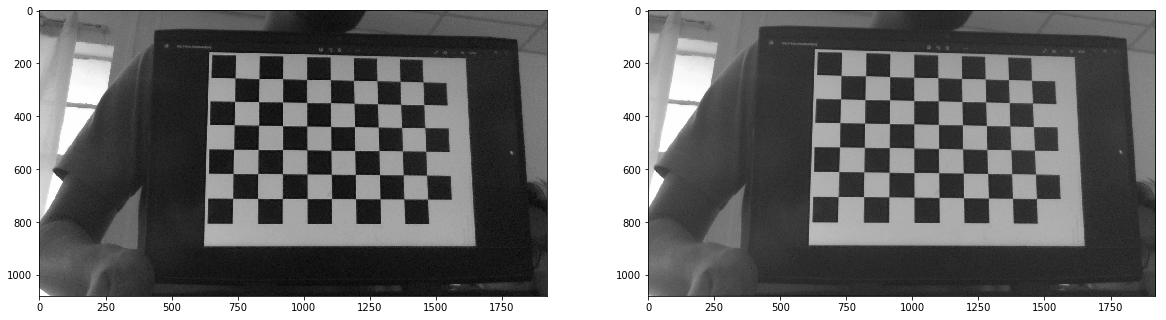

In [37]:
img = Image.open(FOLDER+"001.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_r, dist_coeff_r, None, K_r)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

## Save parameters

In [38]:
np.save("K_l.npy", K_l)
np.save("K_r.npy", K_r)

np.save("dist_coeff_l.npy", dist_coeff_l)
np.save("dist_coeff_r.npy", dist_coeff_r)